## Introduction to Scikit-Learn (sk learn)

This notebook will demostrate some of the most importanant and useful functions of scikit learn.

Things which we are going to cover:

0. An end-to-end scikit learn workflow.
1. Getting the data ready.
2. Choose the right estimator/algorithm for our problem.
3. Fit the model/algorithm and use it to make prediction on our data. 
4. Evaluating a model.
5. Improve a model.
6. Save and load a trained model
7. putting it all together!!!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 0. An end-to-end workflow of Scikit-Learn

In [2]:
# 1. get ready the data

heart_disease = pd.read_csv("demo_data/10.3 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create X (features matrix)
X = heart_disease.drop("target", axis=1)

# create y (labels)
y = heart_disease["target"]

In [4]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.1 (default, Mar  2 2020, 13:06:26) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Public\anaconda3\envs\env\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
       pip: 20.0.2
setuptools: 46.0.0.post20200309
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: None
    pandas: 1.0.1
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


In [5]:
# to filter the warnings
# import warnings
# warnings.filterwarnings("ignore")

In [6]:
# 2. Choose the right model and hyperparameter
# here our problem is classification problem as we are predicting heart disease for patient

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [11]:
# make a prediction
# y_label = clf.predict(np.array([0, 2, 3, 4]))

In [12]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [13]:
y_test

260    0
48     1
261    0
198    0
56     1
      ..
51     1
148    1
289    0
119    1
117    1
Name: target, Length: 61, dtype: int64

In [14]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [15]:
clf.score(X_test, y_test)

0.8524590163934426

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.85      0.82      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [17]:
confusion_matrix(y_test, y_preds)

array([[29,  4],
       [ 5, 23]], dtype=int64)

In [18]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [19]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 78.69%

Trying model with 30 estimators...
Model accuracy on test set: 75.41%

Trying model with 40 estimators...
Model accuracy on test set: 83.61%

Trying model with 50 estimators...
Model accuracy on test set: 85.25%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 85.25%

Trying model with 90 estimators...
Model accuracy on test set: 83.61%



In [1]:
# 6. Save a model and load it.
import pickle

pickle.dump(clf, open("demo_data/random_forest_model_1.pk1", "wb"))

NameError: name 'clf' is not defined

In [21]:
loaded_model = pickle.load(open("demo_data/random_forst_model_1.pk1", "rb"))
loaded_model.score(X_test, y_test)

0.8360655737704918

## 1. Getting our data ready to be used with Machine Learning
Three main things we have to do:

1. Split the data into features and labels (usually `X` and `y`).
2. Filling (also called imputing) or disregarding missing values.
3. converting non numerical values into numerical values (also called feature encoding).

In [22]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [26]:
# as we have keep 20% of data for testing 
X.shape[0] * .8

242.4

In [27]:
len(heart_disease)

303

## 1.1 Make sure it's all numerical

In [28]:
car_sales = pd.read_csv("demo_data/car-sales-extended.csv")
len(car_sales)

1000

In [29]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [30]:
car_sales.dtypes
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [31]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [32]:
# split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [33]:
# split into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2
                                                   )

In [34]:
# Build machine learning model

# Below code will generate error `ValueError: could not convert string to float: 'Toyota'`

# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [35]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_feature = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorial_feature)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [36]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [37]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Let's refit the model
np.random.seed(42)

model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=.2)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
model.score(X_test, y_test)

0.3235867221569877

## 1.2 What if there were missing values?

1. Fill them with some values (also known as imputation).
2. Remove the samples with missing data altogether.

In [40]:
# import car_sales missing data
car_sales_missing = pd.read_csv("demo_data/9.1 car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
# create X and y
X = car_sales_missing.drop(columns="Price", axis=1)
y = car_sales_missing["Price"]

#### Option 1: Fill missing data with pandas

In [43]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [44]:
# fill the make column
car_sales_missing["Make"].fillna("missing", inplace=True)

# fill the colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# fill the Odometer (KM)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# fill door value
car_sales_missing["Doors"].fillna(4, inplace=True)

# check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [45]:
# remove rows with missing Price values
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [46]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [47]:
# Let's try and convert data into numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorial_features)],
                                 remainder="passthrough")

Transformed_X = transformer.fit_transform(car_sales_missing)
Transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Option 2: Fill missing values with SciKit-Learn

In [48]:
car_sales_missing = pd.read_csv("demo_data/9.1 car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [50]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [51]:
# Fill missing values with SciKit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorial values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an Imputer (something that fills the missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the Data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [52]:
car_sales_filled = pd.DataFrame(filled_X, 
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [53]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [54]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [55]:
# Let's convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorial_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [56]:
# Now we have got our data as numbers and filled (no missing)
# Let's Fit a model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Transformed_X, y, test_size=.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9999491016126744

## Choosing the right eastimator/algorithm for our problem

SciKit-Learn uses eastimator as another term for machine learning model or algorithm.

* Classification- predicting whether a sample is one thing or another
* Regression- Predicting a number

Step 1 - Check the SciKit-Learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Picking a machine learning model for a regression problem

In [57]:
# Import Boston housing data set
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [58]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
# How many sampled?
len(boston_df)

506

In [60]:
# Let's try the Ridge regression model
from sklearn.linear_model import Ridge

# setup random ridge
np.random.seed(42)

# create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instatiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# check the score of the Ridge model on test data
model.score(X_test, y_test)


0.6662221670168522

#### How do we improve this score?

#### What if Ridge wasn't working

#### Let's refer back to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [61]:
# Let's try the Random Forst Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup Random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate Random Forest Regressor
rf.score(X_test, y_test)

0.873969014117403

### 2.2 Choosing and estimator for a classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [62]:
heart_disease = pd.read_csv("demo_data/10.3 heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting to a map and it says to try `LinearSVC`.

In [63]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# Create data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# make the splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instatiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\Public\anaconda3\envs\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8360655737704918

In [64]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [65]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Create data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# make the splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to data

Different Name for:
    `X` = features, features variables, data 
    `y` = labels, targets, target variables

In [66]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Create data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# make the splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier()

# fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

## 3.2 Make predictions using Machine Learning model

2 ways to make predictions:
1.`predict()`
2.`predict_proba()`

In [67]:
# Use a trained model to make predictions
# this doesn't work
# clf.predict(np.array([1, 7, 3, 6, 8]))

In [68]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [69]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [70]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
# Compare predictions to the truth table to evaluate model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [72]:
clf.score(X_test, y_test)

0.8524590163934426

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

#### Make predictions with `predict_prob()`

In [74]:
# predict_prob() returns probabilities of a classification model
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [75]:
# Let's predict on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [76]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


#### `predict()` can also be used for regression model.

In [77]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [78]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instatiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [79]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [80]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [81]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

## 4. Evaluation a machine learning model

Three ways to evaluate SciKit-Learn models/Estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem specific metric function.

### 4.1 Evaluating  the model with `score` method

In [82]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
clf.score(X_train, y_train)

1.0

In [84]:
clf.score(X_test, y_test)

0.8524590163934426

#### Let's do the same but for the regression...

In [85]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instatiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

In [86]:
model.score(X_test, y_test)

0.873969014117403

### 4.2 Evaluating a model using the `scoring` parameter

In [87]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
clf.score(X_test, y_test)

0.8524590163934426

In [89]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [90]:
np.random.seed(42)

# Single training and split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [91]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [92]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 Classification model evaluation metrics

1. Accuracy 
2. Area under ROC curve
3. Confusion matrix
4. Classification report

## Accuracy

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [94]:
np.mean(cross_val_score)

0.8248087431693989

In [95]:
print(f"Heart Disease classifier Cross-validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease classifier Cross-validated Accuracy: 82.48%


### Area under the receiver operating characteristic curve (AUC/ROC)

* Area under the curve (AUC)
* ROC Curve

ROC curve are the comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0 
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [96]:
# Create X data and train set etc...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [97]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [98]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [99]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

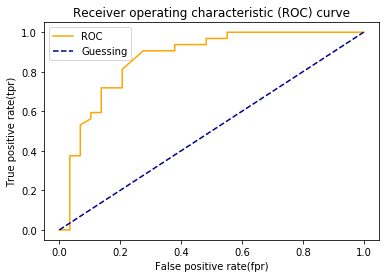

In [100]:
# Create a function for plotting ROC Curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC Curve given the false positive rate (fpr) and
    true positive rate (tpr) of a model.
    """
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", ls="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver operating characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [101]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

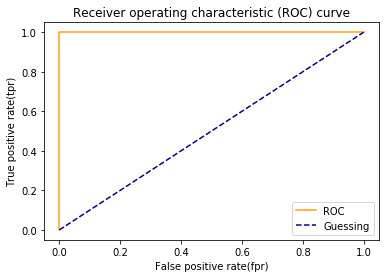

In [102]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [103]:
# Perfect AUC Score
roc_auc_score(y_test, y_test)

1.0

## ** Confusion Matrix **

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of the where the model is getting confused.

In [104]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [105]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
             y_preds,
             rownames=["Actual Labels"],
             colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [106]:
# How to install a conda package into current environment from Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

# All requested packages already installed.



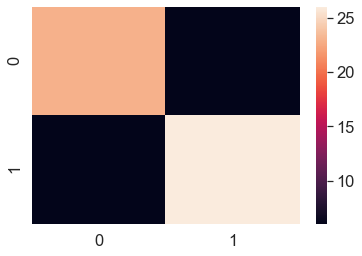

In [107]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

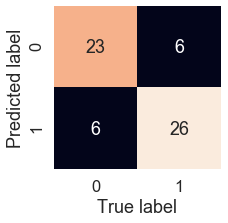

In [108]:
def plot_conf_matrix(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True,  # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_matrix(conf_mat)

In [109]:
# from sklearn.matrics import plot_confusion_matrix

# plot_confusion_matrix(clf, x, y)

## ** Classification Report **

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [111]:
# Where precision and recall become valuable
disease_true = np.zeros(1000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(1000) # model predicts every case as zeros

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\Public\anaconda3\envs\env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


### To summarize:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

## 4.2.2 Regression model evaluation matrics

Model evaluation documentation: https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronouced r-squared) or coefficient of determination
2. Mean absolute Error (MAE)
3. Mean squared error (MSE)

R^2

What R squared does: Compares your models predictions to the mean of the targets. Values can range from negative value (very poor model) to 1. 

For example if your all model does is predict the mean of targets. it's R^2 value would be 0 and if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [112]:
from sklearn.ensemble import RandomForestRegressor

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8933246638119657

In [113]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [114]:
y_test.mean()

22.342156862745103

In [115]:
y_test_mean

array([22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34215686,
       22.34215686, 22.34215686, 22.34215686, 22.34215686, 22.34

In [116]:
r2_score(y_test, y_test_mean)

0.0

### Mean Absolute Error (MAE)

MAE is the average of absolute differences between prediction and actual values. It gives you an idea of how wrong your model's predictions are.

In [117]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)

mae

1.924941176470589

In [118]:
df = pd.DataFrame(data={"actual_values": y_test,
                        "predicted_values": y_preds})
df

,actual_values,predicted_values
203,48.5,47.472
322,20.4,21.401
101,26.5,26.933
438,8.4,9.482
58,23.3,23.214
...,...,...
483,21.8,20.500
292,27.9,27.337
123,17.3,17.296
189,34.9,34.685


In [119]:
df["differances"] = df["predicted_values"] - df["actual_values"]
df

,actual_values,predicted_values,differances
203,48.5,47.472,-1.028
322,20.4,21.401,1.001
101,26.5,26.933,0.433
438,8.4,9.482,1.082
58,23.3,23.214,-0.086
...,...,...,...
483,21.8,20.500,-1.300
292,27.9,27.337,-0.563
123,17.3,17.296,-0.004
189,34.9,34.685,-0.215


## Mean Squared Error (MSE)

In [120]:
# Mean squared Error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)

mse

8.667526607843143

In [121]:
# Calculate MSE by hand
squared = np.square(df["differances"])
squared.mean()

8.667526607843143

### 4.2.3 Using `Scoring` parameter

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [123]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [124]:
# Cross validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [125]:
# Accuracy
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [126]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated accuracy is: {np.mean(cv_precision)*100:.2f}%")

The cross-validated accuracy is: 83.30%


In [127]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated accuracy is: {np.mean(cv_recall)*100:.2f}%")

The cross-validated accuracy is: 85.45%


In [128]:
# f1
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 84.27%


In [129]:
# How about our regression model?

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [131]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2
np.mean(cv_r2)

0.622375083951403

In [132]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_r2
np.mean(cv_r2)

0.622375083951403

In [133]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae
np.mean(cv_mae)

-3.0314302853814783

In [134]:
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse
np.mean(cv_mse)

-21.283214366686064

### 4.3 Using different evaluation metrics as SciKit-Learn functions

Classification Evaluation funtions

In [135]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate Classifier
print("Classifier metrics on test sets")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on test sets
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [136]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using our regression Model
y_preds = model.predict(X_test)

# Evaluation the Regression Model
print("Regression model metrics on the test sets")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test sets
R^2: 0.8739690141174031
Mean Absolute Error: 2.1226372549019623
Mean Squared Error: 9.242328990196082


## 5. Improve a Model

First Prediction = Baseline prediction
First model = Baseline model

From a data Perspective:
* Could we collect more data? (Generally, the more data, the more better)
* Could we improve out data?

From a model Perspective:
* Is there a better model we could use?
* Could we improve our the current model?

Hyperparameters vs. parameters
* Parameters: model find these pattern in data
* Hyperparameters: settings on a model you can adjust to improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By Hand
2. Randomly with RandomsearchCV
3. Exhaustively with GridSearchCV

In [137]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.3.1 Tuning Hyperparameters by Hand

Let's make 3 set Training, validation and Test.

 #### We are going to try and adjust:

* `max_depth` 
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`

In [138]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                    "precision": round(precision, 2),
                    "recall": round(recall, 2),
                    "f1": round(f1, 2)
                   }
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")    
    print(f"F1: {f1:.2f}")
    
    return metric_dict

In [139]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split data into the train, validation and test dataset
train_split = round(.7 * len(heart_disease_shuffled))  # 70% of data
valid_split = round(train_split + .15 * len(heart_disease_shuffled))  # 15% of data

X_train, y_train = X[:train_split] , y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [140]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [141]:
np.random.seed(42)

# Create a seconds classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


## 5.2 Hyperparameters tuning with RandomizedSearchCV

In [142]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) #  n_jobs stands for how many processors you want to assign for this ml job

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=10,  # try 10 models total 
                            cv=5,  # 5 fold cross validations 
                            verbose=2)  # print out 2 results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.6s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   4.5s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


In [143]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [144]:
# Make predictions with Best parameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


## 5.3 Hyperparameter tuning with GridSearchCV

In [145]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [146]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [147]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) #  n_jobs stands for how many processors you want to assign for this ml job

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf, 
                      param_grid=grid_2, 
                      cv=5,  # 5 fold cross validations 
                      verbose=2)  # print out 2 results

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.9s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.4s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.4min finished


In [148]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [149]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


#### Let's compare our different models metrics.

In [150]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, 
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics
                               })

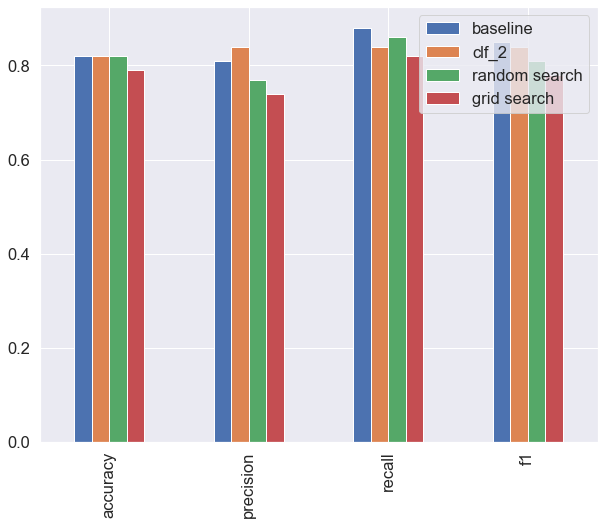

In [151]:
compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and loading trained machine learning models

2 ways to save and load trained machine learning models:
1. With python's `pickle` module
2. With python's `joblib` module

### Pickle

In [152]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("demo_data/gs_random_forest_model_1.pkl", "wb"))

In [153]:
# Load saved model
loaded_pickle_model = pickle.load(open("demo_data/gs_random_forest_model_1.pkl", "rb"))

In [154]:
# Make some pridictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

#### Joblib


In [155]:
from joblib import dump, load

# Save model to fle
dump(gs_clf, filename="demo_data/gs_random_forest_model_1.joblib")

['demo_data/gs_random_forest_model_1.joblib']

In [156]:
# Import a saved joblib model!
loaded_job_model = load("demo_data/gs_random_forest_model_1.joblib")

In [157]:
# Make and Evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting up all together!!!

In [158]:
data = pd.read_csv("demo_data/9.1 car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [159]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [160]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Steps we want to do (all in one cell)

1. Fill the missing value
2. Convert data into numerical form
3. Build a machine learning model on the data


In [161]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing data
data = pd.read_csv("demo_data/9.1 car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorial_feature = ["Make", "Colour"]
categorial_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                         ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                        ])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing value then convert into numbers)
preprocessor = ColumnTransformer(transformers=[
                                     ("cat", categorial_transformer, categorial_feature),
                                     ("door", door_transformer, door_feature),
                                     ("num", numeric_transformer, numeric_feature)
                                 ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
                        ("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())
                       ])

# Split the data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and Score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

#### It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our pipeline.

In [162]:
# Use gridsearchCV with our pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.8s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.8s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.8s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.8s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.8s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.8s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.8s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   7.7s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   6.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   7.5s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  5.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [163]:
gs_model.score(X_test, y_test)

0.3339554263158365